In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

putanja_slike = "2.png"

slika = cv2.imread(putanja_slike, cv2.IMREAD_GRAYSCALE)

_, binarna_slika = cv2.threshold(slika, 128, 255, cv2.THRESH_BINARY)

zamucena_slika = cv2.GaussianBlur(binarna_slika, (3, 3), 0)



In [4]:

krugovi = cv2.HoughCircles(
    zamucena_slika,
    cv2.HOUGH_GRADIENT,
    dp=1, minDist=20, param1=100, param2=30,
    minRadius=22, maxRadius=50
)

broj_generatora = 0
broj_otpornika = 0

binarna_slika_rgb=cv2.cvtColor(binarna_slika, cv2.COLOR_GRAY2RGB)


In [5]:
#prvi put kada se registruju krugovi(generatori), bri[u se, odnosno boje se u belo, kako bi se ostale stvari u kolu lakse prepoznale
if krugovi is not None:
    krugovi = np.uint16(np.around(krugovi))
    obojena_slika = cv2.cvtColor(binarna_slika, cv2.COLOR_GRAY2BGR)
    
    for krug in krugovi[0, :]:
        x, y, radius = krug
        cv2.circle(binarna_slika_rgb, (x, y), radius, (255, 255, 255), 7)
        cv2.circle(binarna_slika, (x, y), radius, 255, 8)
        broj_generatora += 1



"""if krugovi is not None:
    krugovi = np.uint16(np.around(krugovi))
    obojena_slika = cv2.cvtColor(binarna_slika, cv2.COLOR_GRAY2BGR)
    
    for krug in krugovi[0, :]:
        x, y, radius = krug
        cv2.circle(binarna_slika, (x, y), radius, (0), 2)
        
"""


'if krugovi is not None:\n    krugovi = np.uint16(np.around(krugovi))\n    obojena_slika = cv2.cvtColor(binarna_slika, cv2.COLOR_GRAY2BGR)\n    \n    for krug in krugovi[0, :]:\n        x, y, radius = krug\n        cv2.circle(binarna_slika, (x, y), radius, (0), 2)\n        \n'

In [6]:
#deo koji brise crne linije koje su horiyontalne i vertikalne------------------------------------------

for y in range(binarna_slika.shape[0]):
    broj_crnih = 0
    
    for x in range(binarna_slika.shape[1]):
        if binarna_slika[y, x] == 0:
            broj_crnih += 1
            if broj_crnih >= 20:
                for i in range (0,20):
                    binarna_slika_rgb[y,x-i]=(0,255,0)
                    binarna_slika[y,x-i]=255
                while x < binarna_slika.shape[1] and binarna_slika[y, x] == 0:
                    binarna_slika_rgb[y, x] = (0,255,0)# Pobeli crne piksele
                    binarna_slika_rgb[y, x] = 255
                    x += 1
        else:
            broj_crnih = 0


for x in range(binarna_slika.shape[1]):
    broj_crnih = 0
    
    for y in range(binarna_slika.shape[0]):
        if binarna_slika[y, x] == 0:  # Crna boja
            broj_crnih += 1
            if broj_crnih >= 20: 
                for i in range (0,20):
                    binarna_slika_rgb[y-i,x]=(0,255,0)# Promenjeno u >=
                    binarna_slika[y-i,x]=255
                while y < binarna_slika.shape[0] and binarna_slika[y, x] == 0:
                    binarna_slika_rgb[y, x] = (0,255,0)  # Pobeli crne piksele
                    binarna_slika[y, x] = 255
                    y += 1
        
        else:
            broj_crnih = 0

In [7]:
if krugovi is not None:
    krugovi = np.uint16(np.around(krugovi))
    obojena_slika = cv2.cvtColor(binarna_slika, cv2.COLOR_GRAY2BGR)
    
    for krug in krugovi[0, :]:
        x, y, radius = krug
        cv2.circle(binarna_slika_rgb, (x, y), radius, (100,100,255), 2)



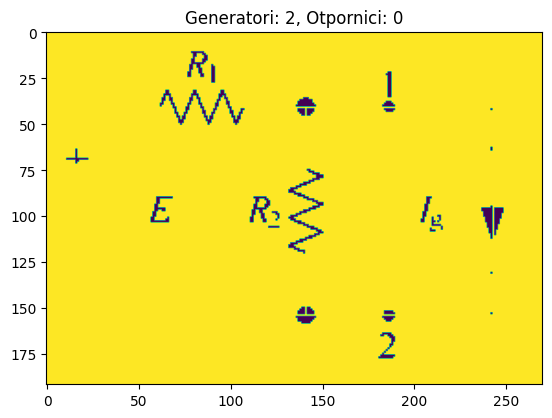

In [10]:
obojena_slika = cv2.cvtColor(binarna_slika, cv2.COLOR_GRAY2BGR) 
plt.imshow(binarna_slika)
plt.title(f'Generatori: {broj_generatora}, Otpornici: {broj_otpornika}')
plt.show()